In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
# Organize data into train, valid, test dirs
os.chdir('D:\DIC\Deep Learning\dogs-vs-cats')  #changing the directory
if os.path.isdir('train/dog') is False:  #If dog folder is not created inside the train folder create all these folder.
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')


#shutil.move() method Recursively moves a file or directory (source) to another location (destination) and returns the destination. If the destination directory already exists then src is moved inside that directory. If the destination already exists but is not a directory then it may be overwritten depending on os.rename() semantics.
#sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence i.e. list, tuple, string or set.   
# glob module is used to retrieve files/pathnames matching a specified pattern    
    
    for i in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('train/dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('train/cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('train/dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('train/cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../')
print(os.getcwd())

D:\DIC\Deep Learning


In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


Accessing the images and displaying them

In [5]:
train_path = 'dogs-vs-cats/train'
valid_path = 'dogs-vs-cats/valid'
test_path = 'dogs-vs-cats/test'

In [6]:
# Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. ... The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.
# Here we use vgg16 model for image input and keeping the size of the image(target_size) as accepted for the vgg16 model.
# ImageDataGenerator.flow_from_directory() creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

# No shuffling of test_batches because it becomes helpful to later get the correct data.

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
# next(train_batches) to generate a batch of images and labels from the training set.
imgs, labels = next(train_batches)

In [8]:
#Function to plot the images.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

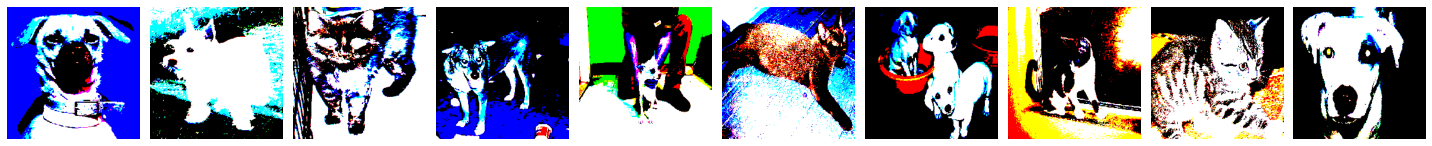

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

Create a model

In [10]:
model=Sequential([Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
MaxPool2D(pool_size=(2,2),strides=2),
Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
MaxPool2D(pool_size=(2,2),strides=2),
Flatten(),
Dense(units=2,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=10,verbose=2)

Epoch 1/10
100/100 - 51s - loss: 21.8941 - accuracy: 0.5610 - val_loss: 10.4932 - val_accuracy: 0.5900
Epoch 2/10
100/100 - 41s - loss: 4.3754 - accuracy: 0.7120 - val_loss: 4.8214 - val_accuracy: 0.5950
Epoch 3/10
100/100 - 42s - loss: 1.1962 - accuracy: 0.8530 - val_loss: 4.1245 - val_accuracy: 0.6300
Epoch 4/10
100/100 - 40s - loss: 0.4170 - accuracy: 0.9150 - val_loss: 3.4848 - val_accuracy: 0.5600
Epoch 5/10
100/100 - 40s - loss: 0.1067 - accuracy: 0.9740 - val_loss: 3.3682 - val_accuracy: 0.6450
Epoch 6/10
100/100 - 40s - loss: 0.0884 - accuracy: 0.9720 - val_loss: 3.5669 - val_accuracy: 0.6000
Epoch 7/10
100/100 - 42s - loss: 0.0757 - accuracy: 0.9770 - val_loss: 3.2532 - val_accuracy: 0.6100
Epoch 8/10
100/100 - 42s - loss: 0.0185 - accuracy: 0.9930 - val_loss: 3.1978 - val_accuracy: 0.6300
Epoch 9/10
100/100 - 41s - loss: 0.0404 - accuracy: 0.9890 - val_loss: 4.4503 - val_accuracy: 0.6100
Epoch 10/10
100/100 - 42s - loss: 0.0061 - accuracy: 0.9980 - val_loss: 3.0645 - val_accu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

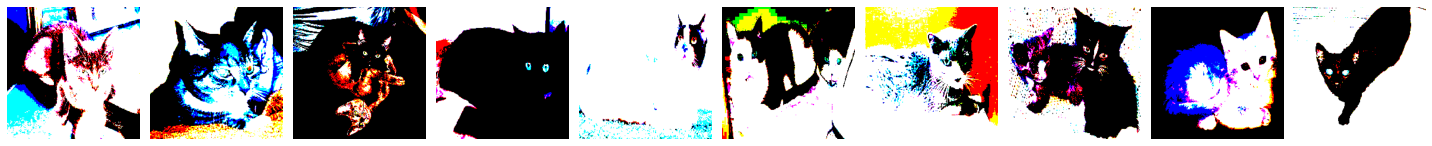

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
predictions=model.predict(x=test_batches,steps=len(test_batches),verbose=0)
predictions

array([[1.00000000e+00, 7.23629601e-10],
       [9.99108613e-01, 8.91344971e-04],
       [2.54122585e-01, 7.45877385e-01],
       [9.99981999e-01, 1.79794552e-05],
       [1.03367136e-04, 9.99896646e-01],
       [7.27444142e-02, 9.27255630e-01],
       [9.78935421e-01, 2.10646112e-02],
       [1.00000000e+00, 4.48870274e-08],
       [6.15205558e-04, 9.99384761e-01],
       [9.67861235e-01, 3.21387760e-02],
       [8.74529064e-01, 1.25470921e-01],
       [9.93423820e-01, 6.57610036e-03],
       [9.24354851e-01, 7.56451339e-02],
       [9.81207609e-01, 1.87924113e-02],
       [9.69971895e-01, 3.00280601e-02],
       [9.99974966e-01, 2.50614594e-05],
       [1.00000000e+00, 8.77260029e-14],
       [1.00000000e+00, 4.71950146e-10],
       [9.99946475e-01, 5.34671526e-05],
       [9.99998331e-01, 1.67775261e-06],
       [9.99997139e-01, 2.91956553e-06],
       [1.00000000e+00, 9.92404603e-10],
       [2.01461604e-04, 9.99798596e-01],
       [9.97877002e-01, 2.12300569e-03],
       [9.892882

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
np.argmax(predictions,axis=-1)

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[35 15]
 [14 36]]


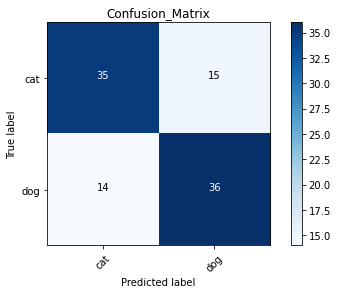

In [22]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_Matrix')

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 160s 0us/step


Fine Tuning 

Build a Fine-Tuned Neural Network

In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model)

keras.engine.functional.Functional

In [26]:
#Since the model is of the type Function we need to covert it to sequential model.
#We copy all the layers to the new model expcept the last layer as we just want an output on the 2 categories and not on 1000 and hence fine tuning it.
model=Sequential()
for layers in vgg16_model.layers[:-1]:
    model.add(layers)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
#We don't want the  other layers to get trained as they are already trained. 
# When we add our own last layer there the layer and weights will be trained.
for layers in model.layers:
    layers.trainable=False

In [29]:
#We add our last output layer for the 2 possible outcomes.

model.add(Dense(units=2,activation='softmax'))

In [30]:
#The no.of training parameters have been changed since we stopped the training of all the other layers except the last added layer.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Training the model

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=5,verbose=2)

Epoch 1/5
100/100 - 271s - loss: 0.3712 - accuracy: 0.8520 - val_loss: 0.1577 - val_accuracy: 0.9500
Epoch 2/5
100/100 - 278s - loss: 0.0863 - accuracy: 0.9680 - val_loss: 0.1193 - val_accuracy: 0.9650
Epoch 3/5
100/100 - 250s - loss: 0.0561 - accuracy: 0.9850 - val_loss: 0.1154 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 243s - loss: 0.0401 - accuracy: 0.9890 - val_loss: 0.1083 - val_accuracy: 0.9650
Epoch 5/5
100/100 - 243s - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.1092 - val_accuracy: 0.9650


In [35]:
predictions=model.predict(x=test_batches,verbose=2,steps=len(test_batches))
predictions

10/10 - 25s


array([[9.98729885e-01, 1.27005251e-03],
       [9.99241114e-01, 7.58877606e-04],
       [9.88844037e-01, 1.11559797e-02],
       [9.98359263e-01, 1.64076488e-03],
       [9.84682560e-01, 1.53174922e-02],
       [9.97602284e-01, 2.39769206e-03],
       [9.99771297e-01, 2.28727935e-04],
       [9.99887586e-01, 1.12352209e-04],
       [9.94453371e-01, 5.54658100e-03],
       [9.97826040e-01, 2.17387965e-03],
       [9.99940157e-01, 5.98783372e-05],
       [9.92137969e-01, 7.86201656e-03],
       [9.95425045e-01, 4.57491074e-03],
       [9.32251930e-01, 6.77480549e-02],
       [9.98840868e-01, 1.15912920e-03],
       [9.98906970e-01, 1.09305035e-03],
       [9.98849273e-01, 1.15072855e-03],
       [9.96396482e-01, 3.60356388e-03],
       [7.86346972e-01, 2.13652968e-01],
       [9.85547900e-01, 1.44521659e-02],
       [9.99342859e-01, 6.57157449e-04],
       [9.82572436e-01, 1.74276195e-02],
       [9.99845386e-01, 1.54554553e-04],
       [9.99954700e-01, 4.53235116e-05],
       [9.998692

Confusion matrix, without normalization
[[49  1]
 [ 1 49]]


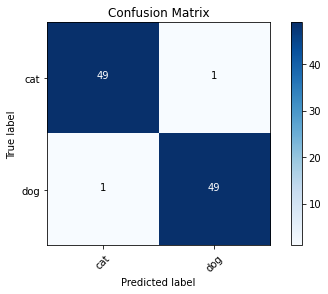

In [34]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')